# 1. 前準備

In [1]:
# 作業フォルダの移動
import os
os.chdir('/work')

In [2]:
# モジュールの読み込み
import pandas as pd

from _config.columns import *
from _config.params import *
from functions.aggregate import *
from functions.modeling import * 

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# データの読み込み
df_agg = pd.read_csv(path_agg, encoding=encoding)
df_ml = pd.read_csv(path_ml, encoding=encoding)

# 2. 基礎集計

houseareaを確認

,データの数,平均値,標準偏差,最小値,第一四分位数,中央値,第三四分位数,最大値
基本統計量,1000,24838.53009,9471.533031,37.78,18393.8425,24742.575,31402.3575,56531.08


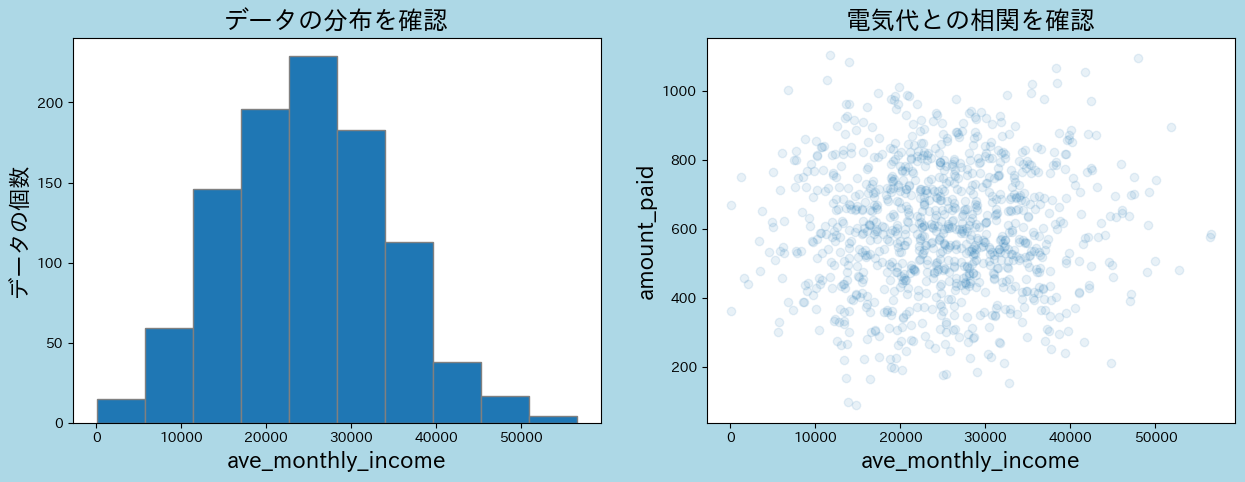

In [5]:
aggregate_display(df=df_agg, column=ave_monthly_income)

ave_monthly_incomeとis_urbanを確認

,データの数,平均値,標準偏差,最小値,第一四分位数,中央値,第三四分位数,最大値
基本統計量,1000,794.70342,147.771736,244.4,691.0375,789.97,892.955,1189.12


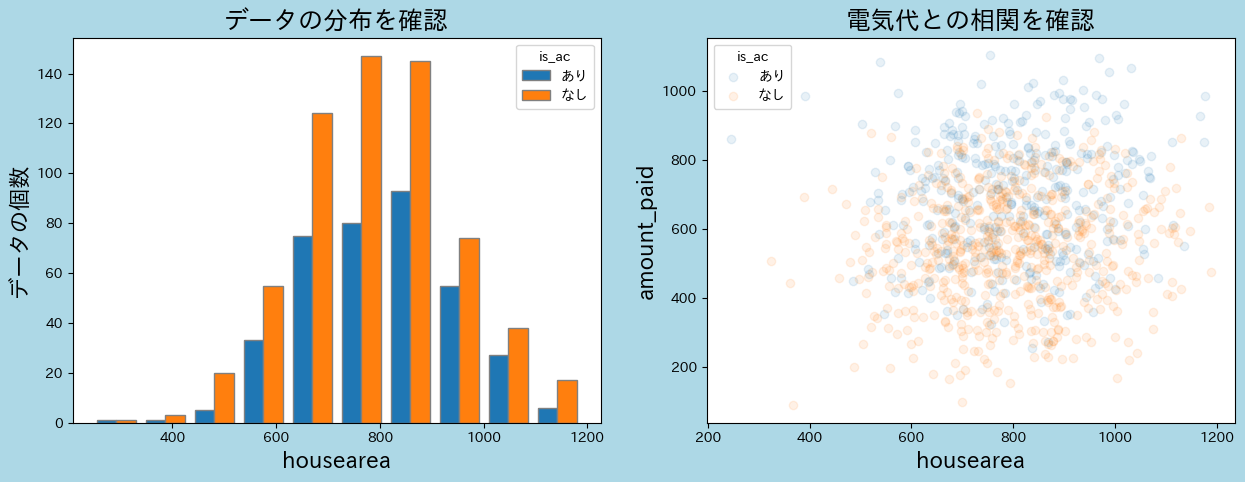

In [6]:
aggregate_display(df=df_agg, column=housearea, hue=is_ac)

is_tvを確認

,データの個数,あり,なし
基本統計量,1000,798,202


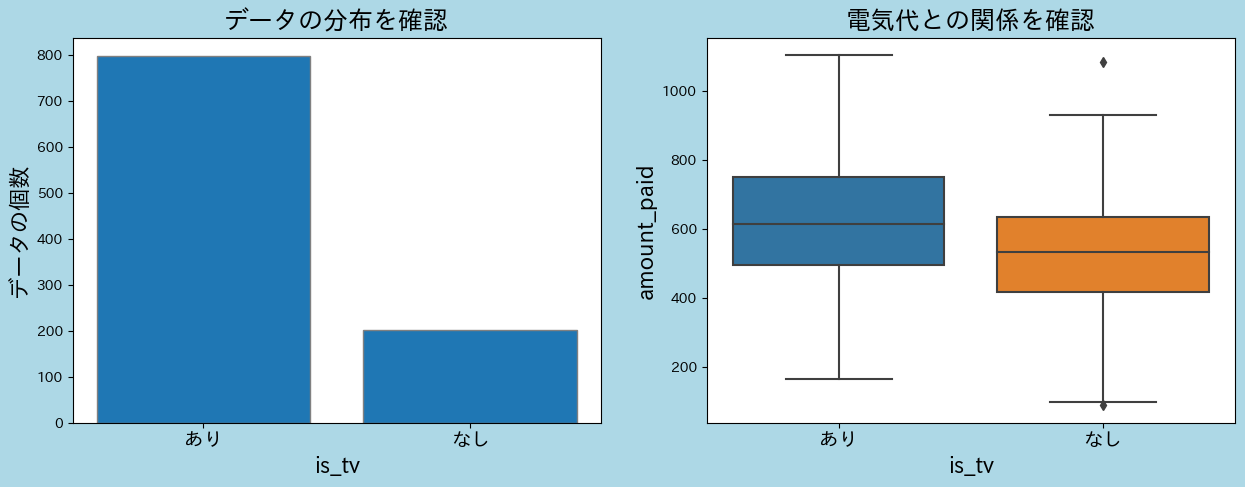

In [7]:
aggregate_display(df=df_agg, column=is_tv)

is_acとis_urbanを確認

,データの個数,あり,なし
基本統計量,1000,376,624


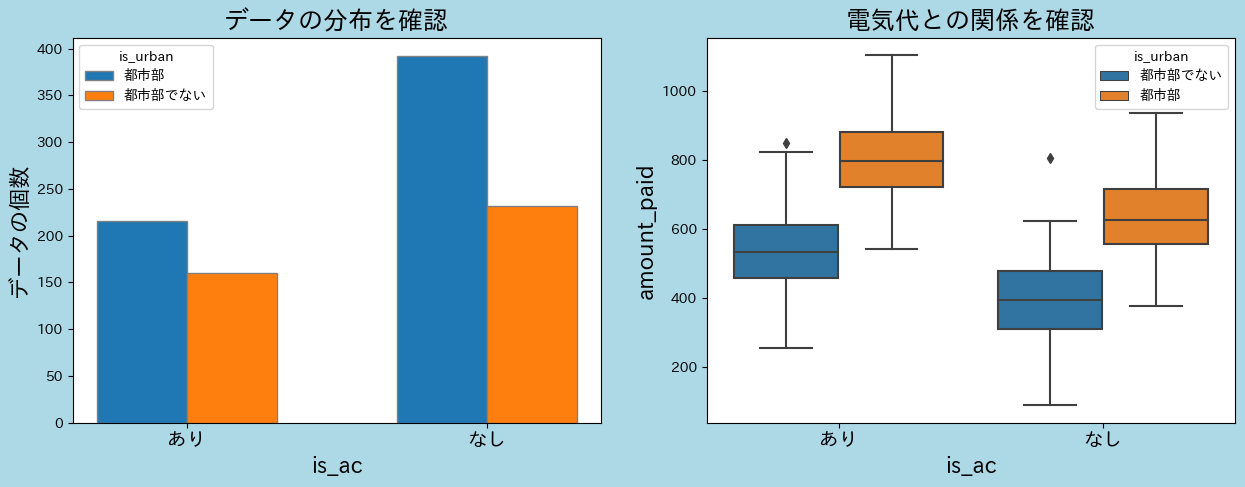

In [8]:
aggregate_display(df=df_agg, column=is_ac, hue=is_urban)

# 3. モデリング

## 3.1. モデルの学習

In [9]:
model = lgbm_build(df=df_ml, target=amount_paid, params=params)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's rmse: 69.5408


/usr/local/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


## 3.2. 予測結果の確認

In [10]:
# model.pred_eval(s=10, e=20)
model.pred_eval(e=10)

【評価指標の確認】
RMSE : 68.45376845170452
R2 : 0.8537934820557388


,電気代_実測値,電気代_予測値
681,748.332329,712.298261
990,615.481956,554.270910
155,622.049595,573.567069
768,484.601514,592.173279
438,177.991498,273.475315
363,481.308233,596.434286
688,682.671809,634.178432
555,434.887313,391.088381
620,715.262044,769.401943
99,559.968969,616.243393


## 3.3. yyplotの確認

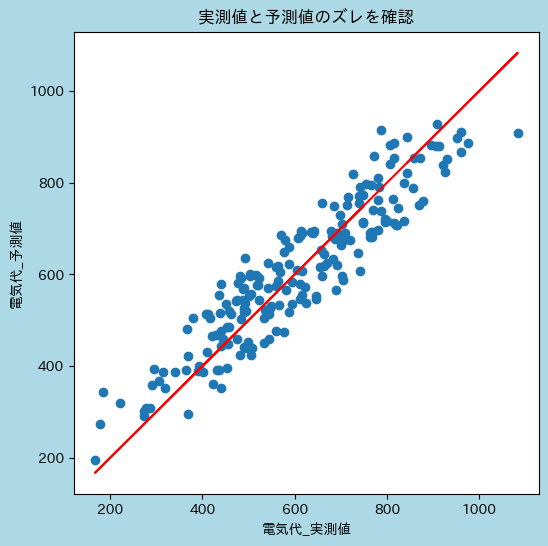

In [11]:
model.yyplot_visual()

## 3.4. 特徴量重要度の確認

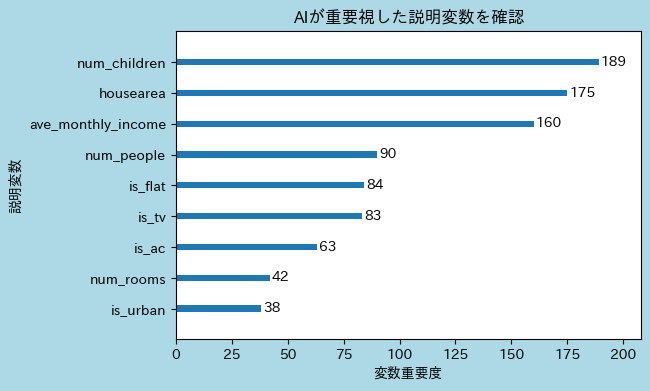

In [12]:
model.feature_importance()

どの特徴量が最も重要なのかは基礎集計だけではわからなかったが、特徴量重要度を可視化することで明確になった